<a href="https://colab.research.google.com/gist/fernandoperezwh/15e898273ec7fdb5d27fb9df19641fbe/01-patrones-de-dise-o-poo-y-solid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación Orientada a Objetos

## Pilares de la Programación Orientada a Objetos

### Abstracción. Clases y Objetos

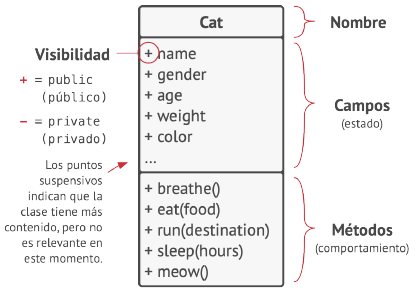

In [ ]:
class Cat: 
  def __init__(self, name, gender, age, weight, color, texture):
    self.name = name
    self.gender = gender
    self.age = age
    self.weight = weight
    self.color = color
    self.texture = texture
    # ...
  
  def breathe(self):
    pass
  
  def eat(self, food):
    pass
  
  def run(self, destination):
    pass
  
  def sleep(self, hours):
    pass

  def meow():
    pass
  

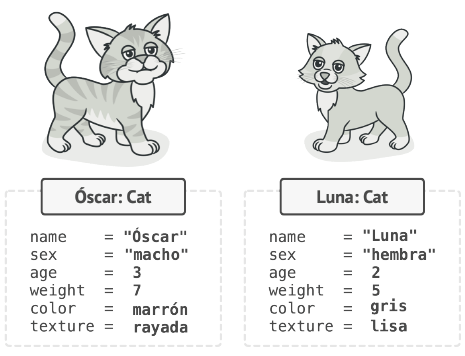

In [ ]:
oscar = Cat(
    name="Óscar",
    gender="macho",
    age=3,
    weight=7,
    color="marrón",
    texture="rayada"
)

luna = Cat(
    name="Luna",
    gender="hembra",
    age=2,
    weight=5,
    color="gris",
    texture="lisa"
)
oscar, luna

(<__main__.Cat at 0x7f012ed9a310>, <__main__.Cat at 0x7f012ed9a690>)

### Encapsulación

In [ ]:
class EjemploEncapsulacion(object):
    atributo_publico = "Soy un atributo público"
    _atributo_protegido = "Soy un atributo alcanzable desde una subclase."
    __atributo_privado = "Soy un atributo inalcanzable desde fuera."

    def metodo_publico(self):
        print(self.__atributo_privado)

    def _metodo_protegido(self):
        print(self._atributo_protegido)

    def __metodo_privado(self):
        print(self.atributo_publico)

ee = EjemploEncapsulacion()

In [ ]:
print(ee.atributo_publico)
print(ee.metodo_publico())

Soy un atributo público
Soy un atributo inalcanzable desde fuera.
None


In [ ]:
# Nos levantara una excepción al intentar
#  llamar un atributo o método privado
print(ee.__atributo_privado)
print(ee.__metodo_privado())

# Nos levantara una excepción al intentar
#  llamar un atributo o método protegido
print(ee._atributo_protegido)
print(ee._metodo_protegido())


AttributeError: ignored

### Herencia

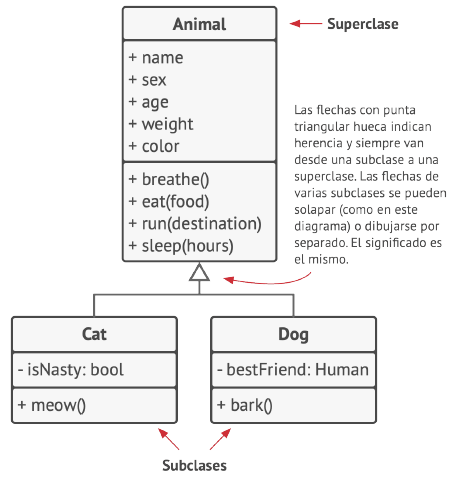

In [ ]:
class Animal(object):
    def __init__(self, name, sex, age, weight, color):
        self.name = name
        self.sex = sex
        self.age = age
        self.weight = weight
        self.color = color
    def breathe(self):
        pass
    def eat(self, foot):
        pass
    def run(self, destination):
        pass
    def sleep(self, hours):
        pass


class Cat(Animal):
    def __init__(self, name, sex, age, weight, color, is_nasty):
        super().__init__(name, sex, age, weight, color)
        self.is_nasty = is_nasty
    def meow(self):
        pass


class Dog(Animal):
    def __init__(self, name, sex, age, weight, color, best_friend):
        super().__init__(name, sex, age, weight, color)
        self.best_friend = best_friend
    def bark(self):
        pass


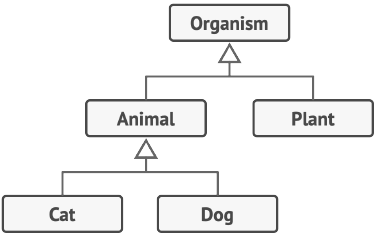

In [ ]:
class Organism(object):
    pass


class Plant(Organism):
    pass


class Animal(Organism):
    pass


class Cat(Animal):
    pass


class Dog(Animal):
    pass

### Polimorfismo

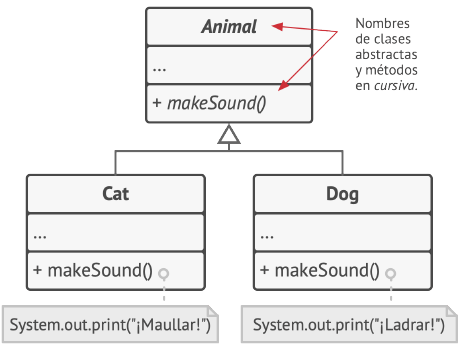

In [ ]:
from abc import abstractmethod
from abc import ABC

class Animal(ABC):
    # ...
    @abstractmethod
    def make_sound(self):
        pass


class Cat(Animal):
    def make_sound(self):
        print("Maullar!")


class Dog(Animal):
    def make_sound(self):
        print("Ladrar!")


class RubberDuck:
    def make_sound(self):
        print("Cuack!")


In [ ]:
bag = [Cat(), Dog(), RubberDuck()]
for element in bag:
    print(isinstance(element, Animal), )
    print(element.make_sound())
    print()

# Principios SOLID

## Single Responsibility Principle / Principio de responsabilidad única


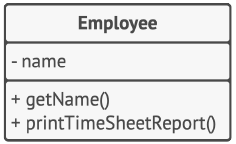

In [ ]:
class Employee:
    def __init__(self, name):
        self.__name = name
    
    def get_name(self):
        return self.__name

    def print_time_sheet_report(self):
        # Lógica compleja
        # ...
        result = self.__name + " - 0001"
        print(result)

e = Employee("Fernando Pérez")
e.print_time_sheet_report()

Fernando Pérez - 0001


Aplicando el principio los cambios quedarian de la siguiente forma

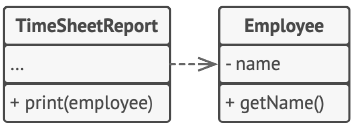

In [ ]:
class Employee:
    def __init__(self, name):
        self.__name = name
    
    def get_name(self):
        return self.__name


class TimeSheetReport:
    def print(self, employee: Employee):
        # Lógica compleja
        # ...
        result = employee.get_name() + " - 0001"
        print(result)

e = Employee("Fernando Pérez")

tsr = TimeSheetReport()
tsr.print(e)

Fernando Pérez - 0001


## Open/Closed Principle / Principio de abierto/cerrado


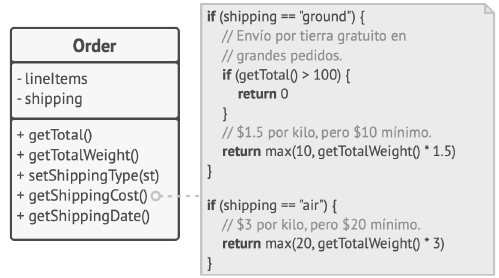

In [ ]:
class Order:
    def __init__(self, line_items, shipping):
        self.__line_items = line_items
        self.__shipping = shipping
    
    def get_total(self):
        pass

    def get_total_weight(self):
        pass

    def set_shipping_type(self, shipping:str):
        self.__shipping = shipping

    def get_shipping_cost(self):
        # Envio por tierra
        if self.shipping == "ground":
            # Envio por tierra gratuito en grandes pedidos
            if self.get_total > 100:
                return 0
            # $1.5 por kilo, pero $10 minimo
            t = self.get_total_weight() * 1.5
            return t if t > 10 else 10
        
        # Envio por aire
        if self.shipping == "air":
            # $3 por kilo, pero $20 minimo
            t = self.get_total_weight() * 3
            return t if t > 20 else 20
        
        # XXX: Agregar aqui mas envios ...
    
    def get_shipping_date(self):
        pass

Aplicando el principio los cambios quedan de la siguiente forma.

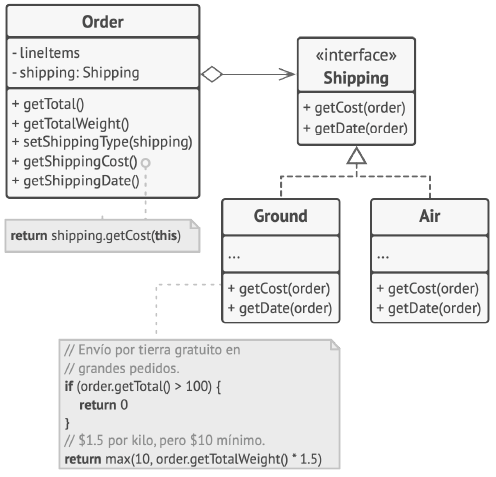


Primero debemos definir la interfaz

In [ ]:
from abc import abstractmethod
from abc import ABC

class Shipping(ABC):
    @abstractmethod
    def get_cost(self, order):
        pass

    @abstractmethod
    def get_date(self, order):
        pass

Modificamos la clase Order para hacerlo mas escalable utilizando el polimorfismo

In [ ]:
class Order:
    def __init__(self, line_items, shipping):
        self.__line_items = line_items
        self.__shipping = shipping
    
    def get_total(self):
        pass

    def get_total_weight(self):
        pass

    def set_shipping_type(self, shipping:Shipping):
        self.__shipping = shipping

    def get_shipping_cost(self):
        # Aplicando polimorfismo y con la interface podemos
        #  obtener el costo dependiento de la instancia en shippping
        self.__shipping.get_cost()
    
    def get_shipping_date(self):
        pass

Ahora podemos agregar los metodos de envio de una forma sencilla que permite la escalabilidad.

Solo debemos de utilizar la interfaz `Shipping` e implementar la lógica en el metodo `get_cost()`

In [ ]:
class Ground(Shipping):
    def get_date(self):
        pass

    def get_cost(self, order: Order):
        # Envio gratuito en grandes pedidos
        if self.get_total > 100:
            return 0
        # $1.5 por kilo, pero $10 minimo
        t = self.get_total_weight() * 1.5
        return t if t > 10 else 10
        

class Air(Shipping):
    def get_date(self):
        pass
        
    def get_cost(self, order: Order):
        # $3 por kilo, pero $20 minimo
        t = self.get_total_weight() * 3
        return t if t > 20 else 20


class Sea(Shipping):
    def get_date(self):
        pass

    def get_cost(self, order: Order):
        """
        Ahora implementar otro metodo de envio es mas escalable
        """
        return 999

## Liskov Substitution Principle / Principio de sustitución de Liskov


Ejemplo de jerarquia de clases que violan del principio de sustitución

In [ ]:
class Ave:
    def __init__(self, nombre):
        self.nombre = nombre
        # ...

    def comer(self):
        print(F"{self.nombre} - comiendo!")
    
    def volar(self):
        print(F"{self.nombre} - volando!")
    

In [ ]:
class Aguila(Ave):
    pass

class Buho(Ave):
    pass

In [ ]:
class Pinguino(Ave):
    def volar(self):
        raise Exception("Espera!... Los pingûinos no vuelan")


In [ ]:
class Client():
    def __init__(self):
        self.__aves = []

    def set_aves(self, aves):
        self.__aves = aves
    
    def alimentar(self):
        for ave in self.__aves:
            ave.comer()
    
    def liberar(self):
        for ave in self.__aves:
            if not isinstance(ave, Pinguino):
                ave.volar()

c = Client()
c.set_aves([Aguila('Aguila'), Buho('Buho'), Pinguino('Pinguino')])

c.alimentar()

c.liberar()

Aguila - comiendo!
Buho - comiendo!
Pinguino - comiendo!
Aguila - volando!
Buho - volando!


El cliente se vuelve dependiente.
Se descompondrá si no comprobamos el ave cuando se agrege uno nuevo

❌ Open/Closed

In [ ]:
class Avestruz(Ave):
    def volar(self):
        raise Exception("Espera!... Tampoco vuelan")

In [ ]:
c = Client()
c.set_aves([Aguila('Aguila'), Buho('Buho'), Pinguino('Pinguino'),
            Avestruz('Avestruz')])

c.alimentar()

c.liberar()

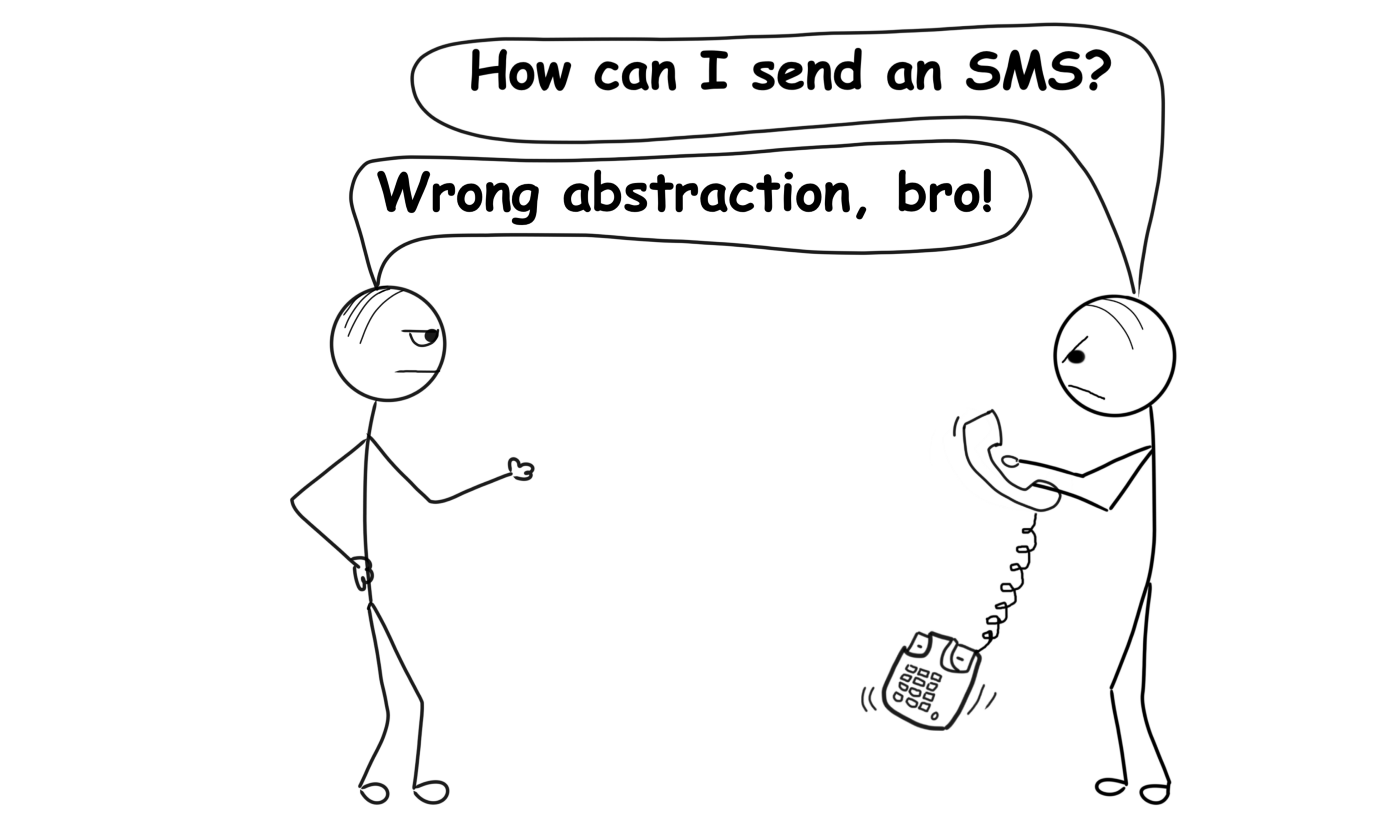

In [ ]:
class Ave():
    def __init__(self, nombre):
        self.nombre = nombre
        # ...

    def comer(self):
        print(F"{self.nombre} - comiendo!")
    

class AveQueVuela(Ave):
    def volar(self):
        print(F"{self.nombre} - volando!")

In [ ]:
class Aguila(AveQueVuela):
    pass

class Buho(AveQueVuela):
    pass

In [ ]:
class Pinguino(Ave):
    pass

class Avestruz(Ave):
    pass

In [ ]:
class Client():
    def __init__(self):
        self.__aves = []
        self.__aves_que_vuelan = []

    def set_aves(self, aves: Ave):
        self.__aves = aves
    
    def set_aves_que_vuelan(self, aves_que_vuelan: AveQueVuela):
        self.__aves_que_vuelan = aves_que_vuelan

    def alimentar(self):
        for ave in (self.__aves + self.__aves_que_vuelan):
            ave.comer()
    
    def liberar(self):
        for ave in self.__aves_que_vuelan:
            ave.volar()

c = Client()
c.set_aves_que_vuelan([Aguila('Aguila'), Buho('Buho') ])
c.set_aves([Pinguino('Pinguino'), Avestruz('Avestruz')])

c.alimentar()

c.liberar()

Pinguino - comiendo!
Avestruz - comiendo!
Aguila - comiendo!
Buho - comiendo!
Aguila - volando!
Buho - volando!


## Interface Segregation Principle / Principio de segregación de la interfaz


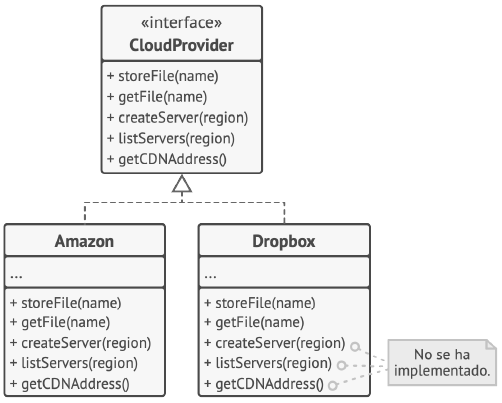

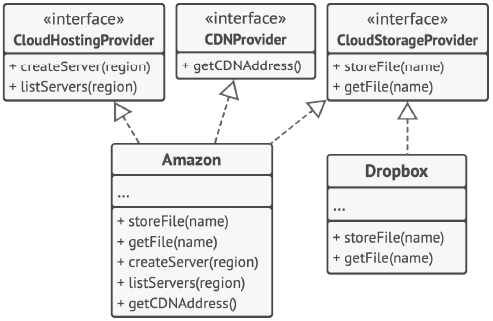

## Dependency Inversion Principle / Principio de inversión de la dependencia


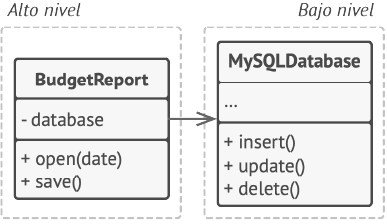

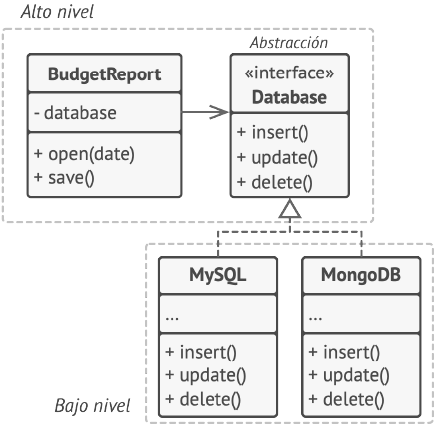